# Support Vector Regression

What is Support Vector Regression ?

In Support Vector Regression, the straight line that is required to fit the data is referred to as hyperplane.The objective of a support vector machine algorithm is to find a hyperplane in an n-dimensional space that distinctly classifies the data points. The data points on either side of the hyperplane that are closest to the hyperplane are called Support Vectors.

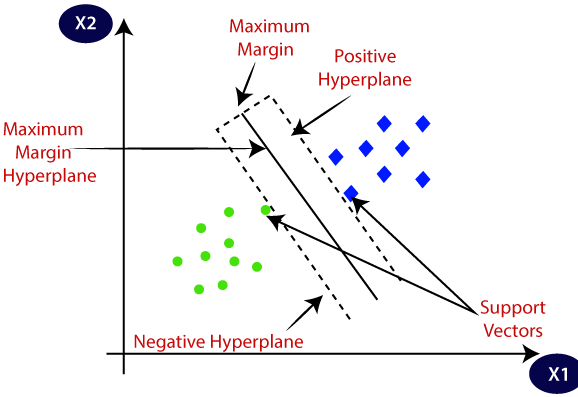

In [1]:
from IPython.display import Image
Image(filename='SVR.png') 

In [2]:
#importing libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
# reading data

d=pd.read_csv('Position_Salaries.csv')

In [4]:
#check for the data size and first five rows

print(f'shape of the data{d.shape}\n')

print(d)


shape of the data(10, 3)

            Position  Level   Salary
0   Business Analyst      1    45000
1  Junior Consultant      2    50000
2  Senior Consultant      3    60000
3            Manager      4    80000
4    Country Manager      5   110000
5     Region Manager      6   150000
6            Partner      7   200000
7     Senior Partner      8   300000
8            C-level      9   500000
9                CEO     10  1000000


In [5]:
#Let's split data into dependent(y) and independent(x)

x = d.iloc[:, 1:-1].values
y = d.iloc[:, -1].values
y = y.reshape(len(y),1)

# With Linear Regression

In [6]:
from sklearn.linear_model import LinearRegression
LR=LinearRegression()
LR.fit(x,y)

LinearRegression()

In [7]:
y_predict=LR.predict(x)
print(y_predict)

[[-114454.54545455]
 [ -33575.75757576]
 [  47303.03030303]
 [ 128181.81818182]
 [ 209060.60606061]
 [ 289939.39393939]
 [ 370818.18181818]
 [ 451696.96969697]
 [ 532575.75757576]
 [ 613454.54545455]]


In [8]:
LR.score(x,y)

0.6690412331929895

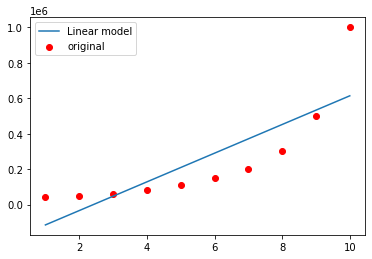

In [9]:
plt.scatter(x,y,label='original',c='red')
plt.plot(x,y_predict,label='Linear model')
plt.legend()

# With Support_vector_regression

In [10]:
#for SVR first we have to do feature-scalling


from sklearn.preprocessing import StandardScaler
sc_x = StandardScaler()
sc_y = StandardScaler()
x2 = sc_x.fit_transform(x)
y2 = sc_y.fit_transform(y)

In [11]:
from sklearn.svm import SVR
svr = SVR(kernel = 'poly')
svr.fit(x2,y2)

C:\Users\DELL\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


SVR(kernel='poly')

In [12]:
y2_predict=svr.predict(sc_x.transform(x))
sc_y.inverse_transform(y2_predict)

array([-406153.33381986,  -90097.02410228,   88401.09900247,
        168643.37452662,  189932.14150242,  191569.7389621 ,
        212858.50593789,  293100.78146205,  471598.9045668 ,
        787655.21428438])

In [13]:
svr.score(x2,y2)

0.645363428211517

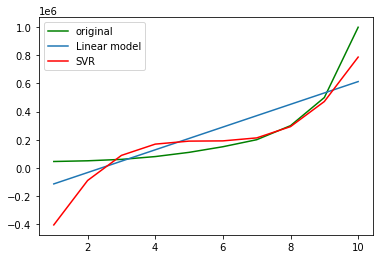

In [14]:
plt.plot(x,y,label='original',c='green')
plt.plot(x,y_predict,label='Linear model')
plt.plot(sc_x.inverse_transform(x2),sc_y.inverse_transform(y2_predict),c='red',label='SVR')
plt.legend()

In [15]:
print(f'score for Linear Regression is = {LR.score(x,y)}')
print(f'Support_Vector_regression is = {svr.score(x2,y2)}')

score for Linear Regression is = 0.6690412331929895
Support_Vector_regression is = 0.645363428211517


In [16]:
#let's check for value

n=input()
print(f'Result of LinearRegression\nfor this position level {n} salary will is = {LR.predict([[n]])}\n')
print(f'Result of Support_Vector_regression\nfor this position level {n} salary will is = {sc_y.inverse_transform(svr.predict(sc_x.transform([[n]])))}')

5
Result of LinearRegression
for this position level 5 salary will is = [[209060.60606061]]

Result of Support_Vector_regression
for this position level 5 salary will is = [189932.14150242]


C:\Users\DELL\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: FutureWarning: Arrays of bytes/strings is being converted to decimal numbers if dtype='numeric'. This behavior is deprecated in 0.24 and will be removed in 1.1 (renaming of 0.26). Please convert your data to numeric values explicitly instead.
  return f(*args, **kwargs)


In [17]:
#you can compare the above values from this data set
print(d)

            Position  Level   Salary
0   Business Analyst      1    45000
1  Junior Consultant      2    50000
2  Senior Consultant      3    60000
3            Manager      4    80000
4    Country Manager      5   110000
5     Region Manager      6   150000
6            Partner      7   200000
7     Senior Partner      8   300000
8            C-level      9   500000
9                CEO     10  1000000
